# Plotting the Housing Data

A good first step when working with any new data set is to do some exploratory data analysis, starting with a plots of the data. Let's download the data. There is some information about the [data set](https://archive.ics.uci.edu/ml/datasets/Housing) at the UCI ML repository. It's a good idea to take a look at the dataset description before proceeding.

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Download the data, save to a file called "housing.data"
import urllib
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
urllib.urlretrieve (data_url, "housing.data")

('housing.data', <httplib.HTTPMessage instance at 0x130c8d9e0>)

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for convenience.

In [4]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

## Loading the Data

Now let's use pandas to load the data into a data frame. Note that the data is space separated (rather than the more common comma separated data). Here are the first few lines:

```
0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
```

In [5]:
import pandas as pd

data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

# Take a look at the first few rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Knowledge Check:

How many rows are in the dataset?

In [10]:
# Compute the number of rows
data.shape

(506, 14)

## Plotting the Data

We are interested in the house values, given in column "MEDV" as a target for modeling. By plotting each of the other columns against "MEDV" we can get a sense of which variables may be correlated.

There are many ways we can plot the data, using `pandas`, `matplotlib`, or `seaborn`. In any case, it's nice to import `seaborn` for the improved styling. Let's try using `pandas` first to make a scatter plot of crime (column "CRIM") versus house value ("MEDV").

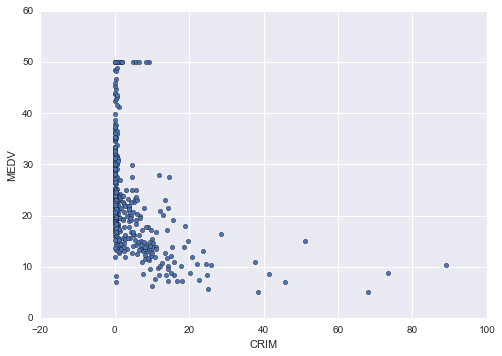

In [4]:
import seaborn as sns

# Plot using pandas
data.plot.scatter(x='CRIM', y='MEDV')


It looks like there is a relationship. While houses in low crime areas can have a wide range of values, houses in high crime areas appear to have lower values.

Knowledge checks:
* How do we select a column of data from a pandas DataFrame?
* Let's make the same plot with matplotlib.

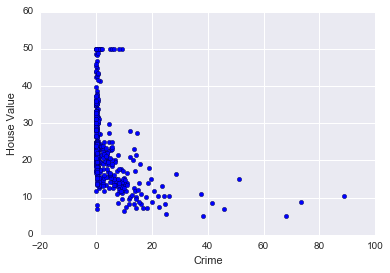

In [12]:
# Knowledge Check Solution
from matplotlib import pyplot as plt

# Plot using matplotlib
plt.scatter(data["CRIM"], data["MEDV"])
plt.xlabel("Crime")
plt.ylabel("House Value")

### Exercises

Exercise 1: Using `pandas` or `matplotlib` plot the remaining variables against "MEDV" and discuss the relationships you find. Question: Which variables seem to correlate well?

### Bonus Exercises

Exercise 2: Seaborn is very handy for making plots of data for exploratory purposes. Try using `seaborn`'s [pairplots](https://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html) to make similar plots.

Exercise 3: Improve your plots by including units and better axis labels. You'll need to read the [data set description](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

Exercise 4: Can you find any visual correlations between two variables other than MEDV?

In [19]:
data.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [ ]:
data[data['sq__ft']]

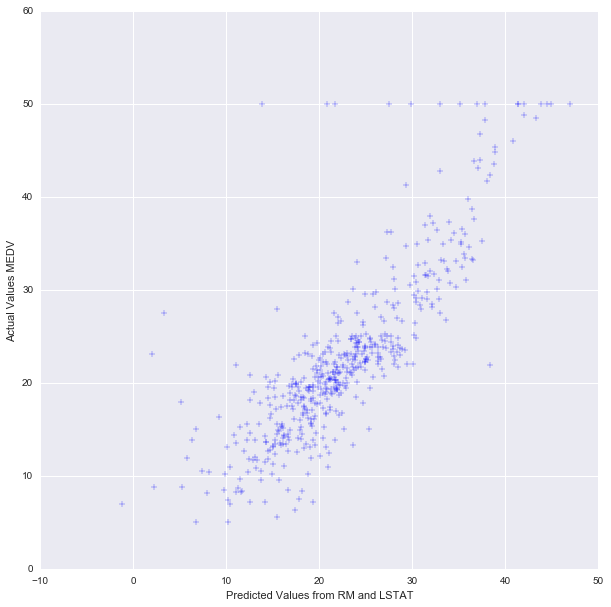

MSE: 26.6593345203


In [28]:
x = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B']]
y = data['MEDV']


lm = linear_model.LinearRegression()


model = lm.fit(x, y)
predictions = model.predict(x)

# Plot the model
plt.figure(figsize=(10,10))
plt.scatter(predictions, y, s=30, c='blue', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")

plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [34]:
#data['MEDV']


AttributeError: 'DataFrame' object has no attribute 'targets'

In [23]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
